In [19]:
import pandas as pd
import soccerdata as sd
import warnings
import matplotlib.pyplot as plt

import sys
import os
warnings.filterwarnings("ignore")

# Add project root to Python path
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

from functions import *

season = "2024-25"
fbref = sd.FBref("Big 5 European Leagues Combined", season)

shooting_df = read_teams_data(fbref, "shooting", "ENG-Premier League")
passing_df = read_teams_data(fbref, "passing", "ENG-Premier League")
possession_df = read_teams_data(fbref, "possession", "ENG-Premier League")
defense_df = read_teams_data(fbref, "defense", "ENG-Premier League")


passing_df = passing_df.drop(["league_", "season_",'players_used_', 'Total_Cmp%', 'Short_Cmp%',
       'Medium_Cmp%', 'Long_Cmp%','Expected_A-xAG','url_'], axis=1)

shooting_df = shooting_df.drop(["league_", "season_", "players_used_","90s_","url_","Expected_np:G-xG","Expected_G-xG",
                "Standard_Dist","Standard_FK","Standard_PK","Standard_PKatt","Expected_npxG/Sh", "Standard_G/Sh", "Standard_G/SoT"],axis=1)

[12/25/25 12:13:17] INFO     Saving cached data to C:\Users\Yassine\soccerdata\data\FBref            ]8;id=54284;file://c:\Python310\lib\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=446913;file://c:\Python310\lib\site-packages\soccerdata\_common.py#263\263]8;;\

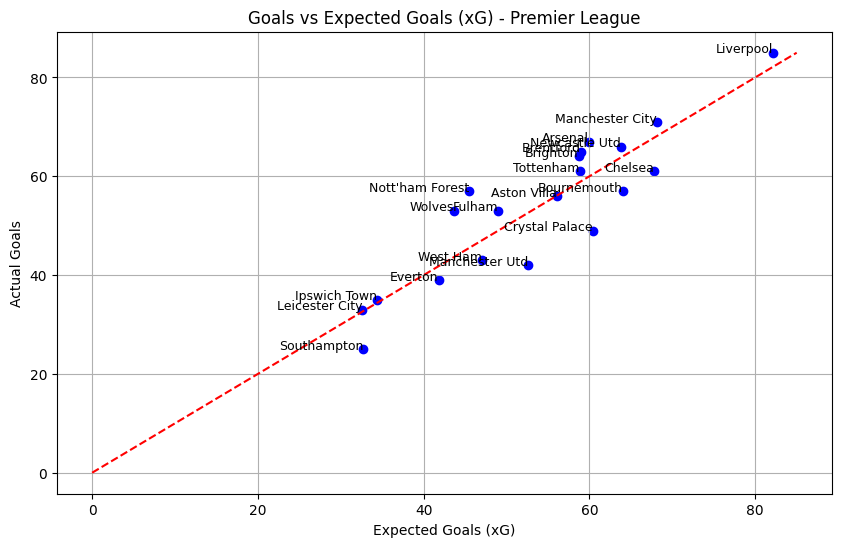

In [13]:
#create plot of goals vs xG for each team
plt.figure(figsize=(10, 6))
plt.scatter(shooting_df['Expected_xG'], shooting_df['Standard_Gls'], color='blue')
plt.plot([0, max(shooting_df['Expected_xG'].max(), shooting_df['Standard_Gls'].max())], [0, max(shooting_df['Expected_xG'].max(), shooting_df['Standard_Gls'].max())], color='red', linestyle='--')
for i, row in shooting_df.iterrows():
    plt.text(row['Expected_xG'], row['Standard_Gls'], row['team_'], fontsize=9, ha='right')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Actual Goals')
plt.title('Goals vs Expected Goals (xG) - Premier League')
plt.grid(True)
plt.show()   

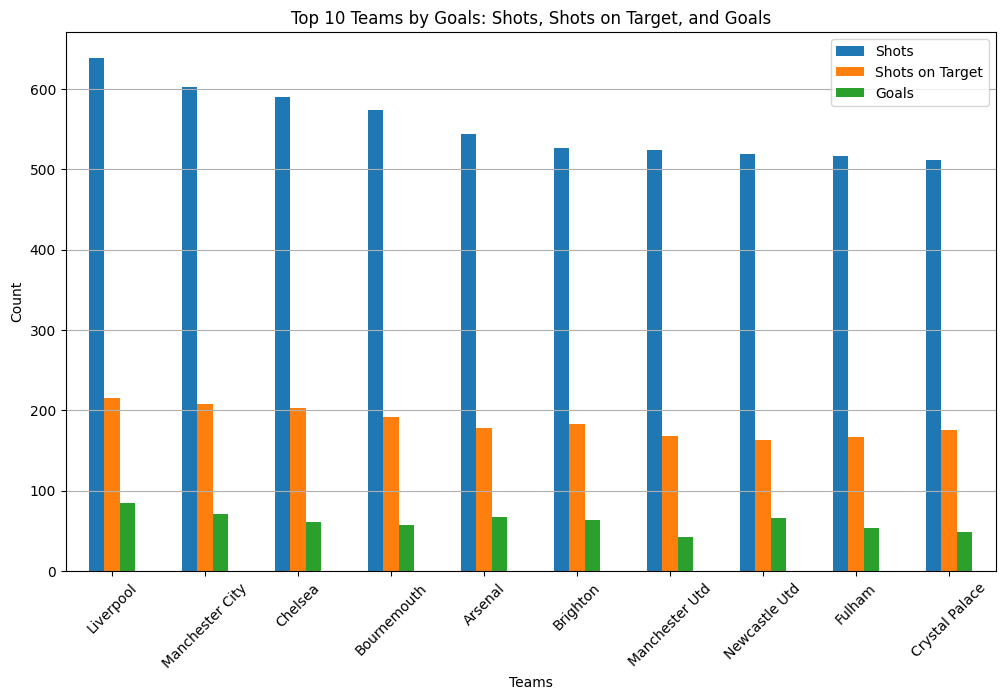

In [14]:
#barplot of sh, SoT and Gls for each team, only top 10 teams by sorted shots
top_10_teams = shooting_df.sort_values(by='Standard_Sh', ascending=False).head(10)
top_10_teams = top_10_teams.set_index('team_')
top_10_teams[['Standard_Sh', 'Standard_SoT', 'Standard_Gls']].plot(kind='bar', figsize=(12, 7))
plt.title('Top 10 Teams by Goals: Shots, Shots on Target, and Goals')
plt.xlabel('Teams')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Shots', 'Shots on Target', 'Goals'])
plt.grid(axis='y')
plt.show()


## Manchester city deep Analysis

In [20]:
#lets explore manschester city data
mc_shooting_df = shooting_df[shooting_df['team_']=='Manchester City']
mc_passing_df = passing_df[passing_df['team_']=='Manchester City']
mc_possession_df = possession_df[possession_df['team_']=='Manchester City']
mc_defense_df = defense_df[defense_df['team_']=='Manchester City']

In [ ]:
mc_passing_df.head()

,team_,90s_,Total_Cmp,Total_Att,Total_TotDist,Total_PrgDist,Short_Cmp,Short_Att,Medium_Cmp,Medium_Att,Long_Cmp,Long_Att,Ast_,xAG_,Expected_xA,KP_,1/3_,PPA_,CrsPA_,PrgP_
12,Manchester City,38,21531,24443,349984,98901,11071,11923,8884,9710,1281,2040,51,54.2,53.8,472,1685,440,62,1944


In [24]:
mc_passing_df.head()

,team_,90s_,Total_Cmp,Total_Att,Total_TotDist,Total_PrgDist,Short_Cmp,Short_Att,Medium_Cmp,Medium_Att,...,Expected_xA,KP_,1/3_,PPA_,CrsPA_,PrgP_,eff_short_pass_%,eff_medium_pass_%,eff_long_pass_%,overall_pass_%
12,Manchester City,38,21531,24443,349984,98901,11071,11923,8884,9710,...,53.8,472,1685,440,62,1944,92.854147,91.493306,62.794118,88.086569


In [22]:
#calculate passing efficiency for short, medium and long passes
mc_passing_df["eff_short_pass_%"] = mc_passing_df["Short_Cmp"] / mc_passing_df["Short_Att"] * 100
mc_passing_df["eff_medium_pass_%"] = mc_passing_df["Medium_Cmp"] / mc_passing_df["Medium_Att"] * 100
mc_passing_df["eff_long_pass_%"] = mc_passing_df["Long_Cmp"] / mc_passing_df["Long_Att"] * 100
mc_passing_df["overall_pass_%"] = mc_passing_df["Total_Cmp"] / mc_passing_df["Total_Att"] * 100

In [30]:
temp = mc_passing_df[['Short_Cmp', 'Short_Att', 'eff_short_pass_%', 
                      'Medium_Cmp', 'Medium_Att', 'eff_medium_pass_%',
                    'Long_Cmp', 'Long_Att',"eff_long_pass_%",
                    'Total_Cmp', 'Total_Att', "overall_pass_%"]]
temp.head()

,Short_Cmp,Short_Att,eff_short_pass_%,Medium_Cmp,Medium_Att,eff_medium_pass_%,Long_Cmp,Long_Att,eff_long_pass_%,Total_Cmp,Total_Att,overall_pass_%
12,11071,11923,92.854147,8884,9710,91.493306,1281,2040,62.794118,21531,24443,88.086569


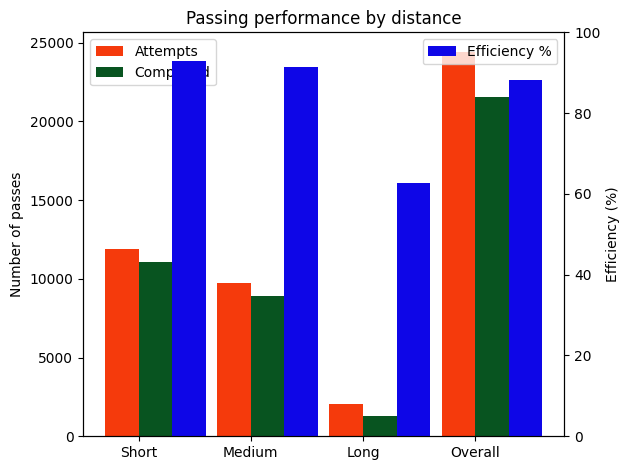

In [40]:
groups = ["Short", "Medium", "Long", "Overall"]

attempts = [
    temp["Short_Att"].iloc[0],
    temp["Medium_Att"].iloc[0],
    temp["Long_Att"].iloc[0],
    temp["Total_Att"].iloc[0]
]

completed = [
    temp["Short_Cmp"].iloc[0],
    temp["Medium_Cmp"].iloc[0],
    temp["Long_Cmp"].iloc[0],
    temp["Total_Cmp"].iloc[0]
]

efficiency = [
    temp["eff_short_pass_%"].iloc[0],
    temp["eff_medium_pass_%"].iloc[0],
    temp["eff_long_pass_%"].iloc[0],
    temp["overall_pass_%"].iloc[0]
]

x = np.arange(len(groups))
width = 0.3

fig, ax1 = plt.subplots()

# Attempts & Completed (left axis)
ax1.bar(x - width/2, attempts, width, label="Attempts",color="#F53A0C")
ax1.bar(x + width/2, completed, width, label="Completed", color="#085420")
ax1.set_ylabel("Number of passes")

# Efficiency (right axis)
ax2 = ax1.twinx()
ax2.bar(x + 1.5*width, efficiency, width, label="Efficiency %", color="#0E06E7")
ax2.set_ylabel("Efficiency (%)")
ax2.set_ylim(0, 100)

# X axis
ax1.set_xticks(x)
ax1.set_xticklabels(groups)
ax1.set_title("Passing performance by distance")

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()
